# Gradient Descent and Neural Networks

Tingting Yang

INDE 577 - Data Science and Machine Learning

# Introduction

Gradient Descent is a very generic optimization algorithm that can find the optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to find the local minimum of a function. Let $f(x)$ denote some differentiable function of $x$. We wish to solve the following minimization problem:

$$ min_{x \in {R^n}} f(x)$$

To find the local minimum of a function using Gradien Descent, steps should be taken proportionally to the opposite of the gradient of the function at the current point. If the steps are taken to proportionally to the positive of the gradient, a local maximum of the function will be approached, and the procedure is called Gradient Ascent.

## Gradient Descent Procedure

In general, the procedure starts off with initial values of $x_0$. The iterative method updates $x$ as

$$x_{n+1} = x_n-\alpha \bigtriangledown f(x_n)$$

where $\alpha$ is the step length and $\bigtriangledown f(x_n)$ is the gradient of $f(x_n)$.


### Learning Rate

The step length $\alpha$ is called Learning rate, which is a tuning parameter in the optimization. It is an important parameter in Gradient Descent. If the learning rate is too small, the algorithm would have to go through many iterations to converge, which would take a long time. On the other hand, if the learning rate is too high, the true "valley" would be missed, and possibly even higher up the value.


### Examples

* For linear regression, $\hat y^i = wx^i +b$, where $w$ is the weight and $b$ is the bias. 
    - Goal: find the best line fitting the data, i.e., find the optimal linear function approximating the data.

* In Neural Network, which are powerful function approximates.
    - Components (Input of neural networks): 1) Weights and bias, 2) Activation function, and 3) Loss function
    - Loss function: 
    $$L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$$
    where $M$ is the number of training data points
    - Goal: find the $w$ and $b$ that minimize the Loss function $L(w,b)$.

Gradient Descent is the best way to achieve the above goals!

### Algorithm

Here, I use the Loss function of $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$ format as an example to show how this algorithm works.

* Step 1: Randomly choose intial $w$ and $b$ (w, b = np.random.rand(2))

* Step 2: Set MAX_ITER = 50 and COUNT = 0

* Step 3: While COUNT < MAX_ITER do 

    - $w = w - \alpha \times \frac{\partial L(w, b)}{\partial w}$
    - $b = b - \alpha \times \frac{\partial L(w, b)}{\partial w}$
    - COUNT += 1

---

# Implement

In the following of this notebook, the implement section includes two parts:

* **Part 1**: find a best linear model for a data with 4 data points using Gradient Descent.

* **Part 2**: use the Gradient Descent to find a linear regression model to predict the body mass of penguin by the flipper length.

---

## Part 1:

There are 4 points in the data, $D = \left \{  (1,2), (1.5,3.5), (2.5,3),(4,5)\right \}$.

The task is to find the best linear model $\hat y^i = wx^i +b$ fitting the data.

We use the Loss funciton: $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$.

Thus, the derivations of the Loss function are:

$$\frac{\partial L(w, b)}{\partial w}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)\cdot x$$

$$\frac{\partial L(w, b)}{\partial b}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)$$

---

In order to achieve the goal, we will need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)

In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

#### Import the dataset: 
$D = \left \{  (1,2), (1.5,3.5), (2.5,3),(4,5)\right \}$.

In [2]:
# Import dataset and set as numpy arrays
X = np.array([1.0, 1.5, 2.5, 4.0])
y = np.array([2.0, 3.5, 3.0, 5.0])

#### Define the Loss function:

 $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$

In [3]:
# Define the Loss function:
def Loss(X, y, w, b):
    # Set up M, which is the number of the training data points
    M = len(y)
    # Set up the Loss function
    loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
    return loss

#### Define the Gradient Descent function:

The derivations of the Loss function are:

$$\frac{\partial L(w, b)}{\partial w}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)\cdot x$$

$$\frac{\partial L(w, b)}{\partial b}=\frac {1}{M}\sum_{i=0}^{M}(wx^i+b-y^i)$$

In [4]:
# Define the Gradient Descent function
def gradL(X, y, w, b):
    # Set up M, which is the number of the training data points
    M = len(y)
    # Set up the derivations of the Loss function
    partial_w = sum((x*w + b - y[i])*x for i, x in enumerate(X))/M
    partial_b = sum((x*w + b - y[i]) for i, x in enumerate(X))/M
    # Output the derivations fo the Loss function
    return partial_w, partial_b

#### Implement the functions to fit the data:

* Set up the Learning rate hyperparameter $\alpha = 0.12$.
* Set MAX_ITER = 100

0.8708218890283348 1.3968228519790598


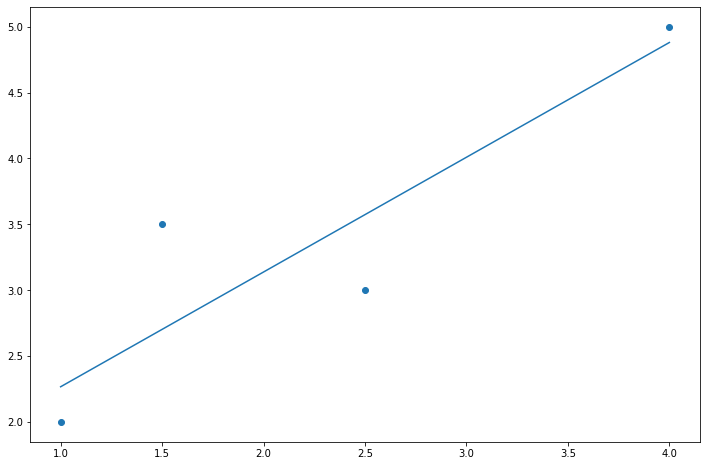

In [5]:
# Set up the learning rate
a = 0.12

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Iterate 100 times to find the w and b that minimize the Loss function
for i in range(101):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)

# Output the w and b    
print (w,b)

# Plot the fitting line with the data points
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
plt.plot(X, [w*x + b for x in X])

From the results above, we can get the linear regression model:

$$\hat y^i = 0.849x^i +1.456$$

---

#### How do the Loss and the fitting model change through the iterations?

To answer this question, we print the Loss and plot the lines for the iterations of 10, 20, 30, 50, and 100.


Loss at iter10=0.2215880017049789
Loss at iter20=0.18889436018359998
Loss at iter30=0.16789778667500121
Loss at iter50=0.14575331088147386
Loss at iter100=0.13190663857886806


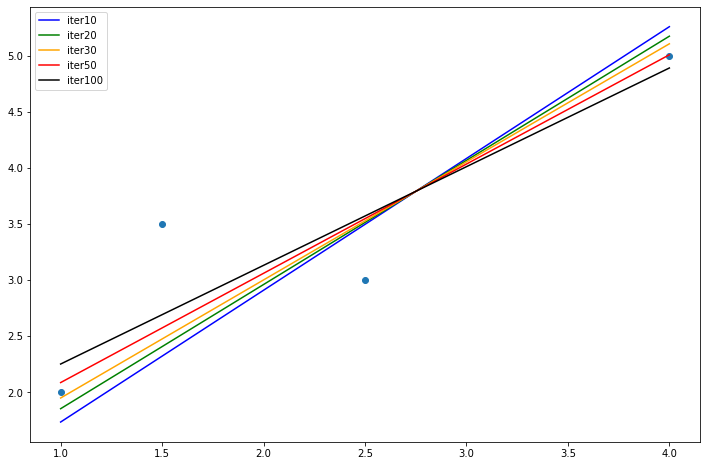

In [6]:
# Set up the learning rate
a = 0.12

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Set up the parameters to plot
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
colors = {10: 'blue', 20: 'green', 30: 'orange', 50: 'red', 100: 'black'}

# Iterate 100 times to find the w and b that minimize the Loss function
for i in range(101):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)
    
    if i in [10, 20, 30, 50, 100]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X, [w*x + b for x in X], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.show()

From the above results, we can find that the Loss values decrease through the iterations and the slopes of the fitting lines (weights) decrease gradually. And finally, we find the best $w$ and $b$ with minimum Loss function of 100 interations.

Let's try different learning rates! 
* A smaller one $\alpha = 0.01$
* A larger one $\alpha = 0.025$

Loss at iter10=0.8401519583099888
Loss at iter20=0.36852541040798964
Loss at iter30=0.2597115153915169
Loss at iter50=0.22379943356564136
Loss at iter100=0.20689422834663856


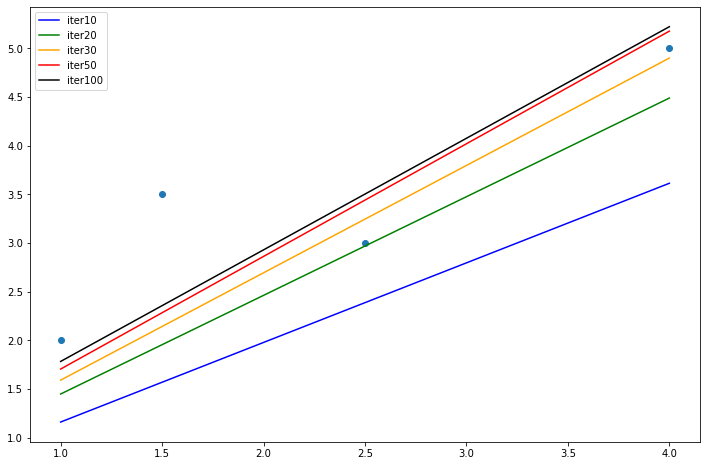

In [7]:
# Set up the learning rate
a = 0.01

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Set up the parameters to plot
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
colors = {10: 'blue', 20: 'green', 30: 'orange', 50: 'red', 100: 'black'}

# Iterate 100 times to find the w and b that minimize the Loss function
for i in range(101):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)
    
    if i in [10, 20, 30, 50, 100]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X, [w*x + b for x in X], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.show()

Loss at iter10=0.16059849903605122
Loss at iter20=0.136688257382532
Loss at iter30=0.13269500854159316
Loss at iter50=0.13059218568058242
Loss at iter100=0.1302119331667649


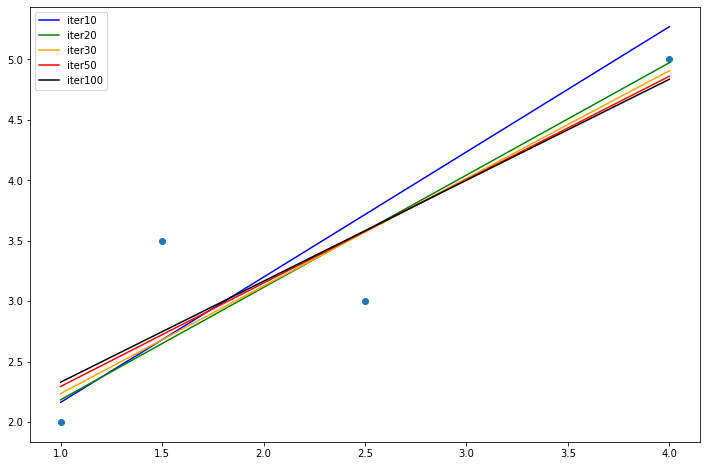

In [8]:
# Set up the learning rate
a = 0.25

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y)

# Set up the parameters to plot
plt.figure(figsize = (12, 8))
plt.scatter(X, y)
colors = {10: 'blue', 20: 'green', 30: 'orange', 50: 'red', 100: 'black'}

# Iterate 100 times to find the w and b that minimize the Loss function
for i in range(101):
    dw, db = gradL(X, y, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X, y, w, b)
    
    if i in [10, 20, 30, 50, 100]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X, [w*x + b for x in X], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.show()

It seems that a larger learning rate ($\alpha = 0.25$) converge faster.

---

### Part 2:

The task is to find a linear regression model to predict the body mass of penguin by the flipper length using the Penguins Dataset. 

### About the Penguins Dataset

The dataset consists of 344 rowa and 7 columns. 

* species: penguin species (Chinstrap, Adélie, or Gentoo)
* island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* bill: bill length (mm)
* bill_depth_mm: bill depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* sex: penguin sex

I will focus on the relationship between the flipper length and the boby mass of penguins. The flippers are penguins wings. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip.

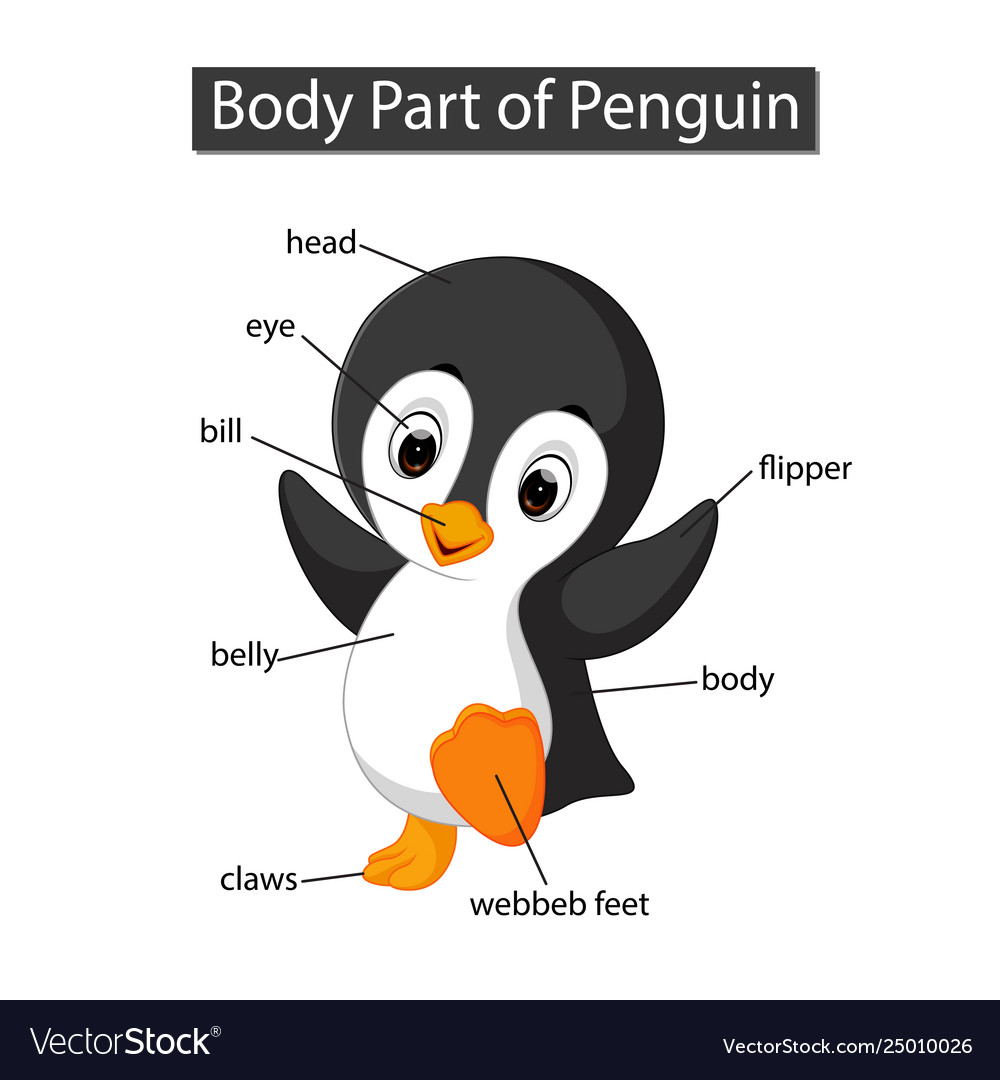


---

### Define Model and Loss function

To achieve the goal, I define the linear regression model as $\hat y^i = wx^i +b$, and I also use the Loss funciton $L(w,b)= \frac {1}{2M} \sum_{i=1}^{M}{(wx^i +b -y^i)^2}$.


---

### Import Necessary Libraries

In order to achieve the goal, we will need the following libraries:

* [matplotlib](http://metplotlib.org)
* [numpy](https://numpy.org/doc/stable/index.html)
* [pandas](http://pandas.pydata.org)
* [seaborn](https://seaborn.pydata.org/)

In [9]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Data Understanding and Data Wrangling

In [10]:
# Import Penguins dataset
penguins = pd.read_csv("C:/Users/Tingting Yang/Desktop/Rice Mstat/Courese/INDE577/Arraged/penguins.csv")

In [11]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [12]:
penguins.shape

(344, 7)

In [13]:
# Remove the NaN values in the features 'flipper_length_mm' and 'body_mass_g'
penguins = penguins.dropna(subset = ['flipper_length_mm', 'body_mass_g'])

In [14]:
penguins.shape

(342, 7)

Plot the scatter plot to have a look at the data distribution:

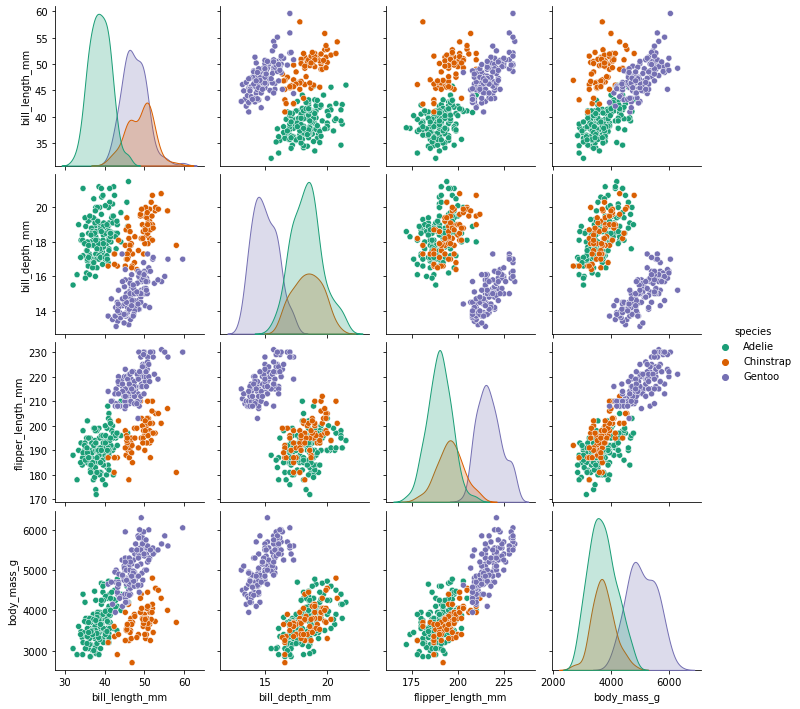

In [15]:
sns.pairplot(penguins, hue='species',palette='Dark2')

Text(0.5, 1.0, 'Penguins Data')

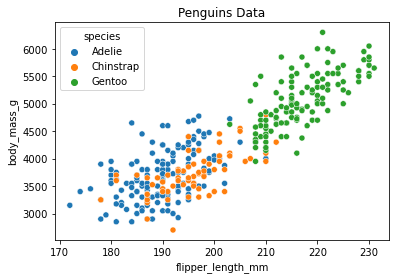

In [16]:
sns.scatterplot(data = penguins, x = "flipper_length_mm", y = "body_mass_g", hue = 'species').set_title("Penguins Data")

From the figures above, regardless of the different species, almost all the points locate around a line from the bottom left corner to the top right corner of the figure, suggesting that there is a linear relationship between the flipper length and the body mass of the penguins. 

And thus, data from all penguins species can be mixed together to find the linear model.

### Train and Test Data Split

In [17]:
# Extract out desired features from Penguins Dataset, and covert features to numpy array
X = penguins['flipper_length_mm'].to_numpy()

# Extract out labels, and convert labels to numpy array
y = penguins['body_mass_g'].to_numpy()

In [18]:
# Use the train_test_split function in sklearn package
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42) 

### Define the functions for Gradient Descent

Since I use the same model and Loss function as Part 1 above, the defined Loss function and the Gradient Descent function can be directly used in this part.

In [19]:
# Define the Loss function:
def Loss(X, y, w, b):
    # Set up M, which is the number of the training data points
    M = len(y)
    # Set up the Loss function
    loss = sum(.5*(x*w + b - y[i])**2 for i, x in enumerate(X))/M  ## enumerate output the index?
    return loss

# Define the Gradient Descent function
def gradL(X, y, w, b):
    # Set up M, which is the number of the training data points
    M = len(y)
    # Set up the derivations of the Loss function
    partial_w = sum((x*w + b - y[i])*x for i, x in enumerate(X))/M
    partial_b = sum((x*w + b - y[i]) for i, x in enumerate(X))/M
    # Output the derivations fo the Loss function
    return partial_w, partial_b

### Train the data to find the best linear model

Since the X and y have different scales, the learning rate should be much smaller. I set $\alpha=0.00005$ and run 10000 iterations.

21.11092823144674 0.20688043802408032


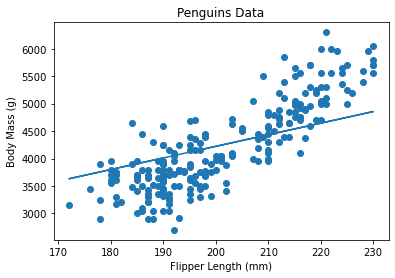

In [20]:
# Set up the learning rate
a = 0.000005

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y_train)

# Iterate 1000 times to find the w and b that minimize the Loss function
for i in range(1001):
    dw, db = gradL(X_train, y_train, w, b)
    #print(dw, db)
    w = w - a * dw
    b = b- a * db
    #print(w, b)
    L = Loss(X_train, y_train, w, b)

# Output the w and b    
print(w,b)

# Plot the fitting line with the data points
plt.scatter(X_train, y_train)
plt.plot(X_train, [w*x + b for x in X_train])
plt.title("Penguins Data")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

From the results above, the linear regression model is 
$$\hat y^i= 21.11x^i + 0.50$$
The penguins' flipper length increase by 1 mm would lead to the increasement of body mass by 21.11 g.

I also want to find the change of the Loss and the fitting model through the iterations.

Loss at iter10=216620.83065948938
Loss at iter20=158456.7677797365
Loss at iter30=157838.9788125723
Loss at iter50=157832.27734901124
Loss at iter100=157832.09988407642


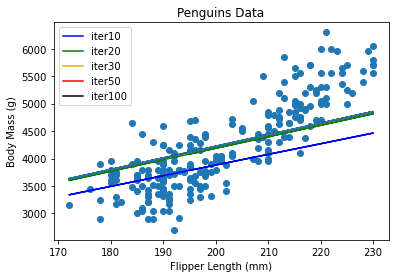

In [21]:
# Set up the learning rate
a = 0.000005

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y_train)

# Set up the parameters to plot
plt.scatter(X_train, y_train)
colors = {10: 'blue', 20: 'green', 30: 'orange', 50: 'red', 100: 'black'}

# Iterate 100 times to find the w and b that minimize the Loss function
for i in range(101):
    dw, db = gradL(X_train, y_train, w, b)
    w = w - a * dw
    b = b- a * db
    L = Loss(X_train, y_train, w, b)
    
    if i in [10, 20, 30, 50, 100]:
        # Print the Loss velus during the iterations
        print(f'Loss at iter{i}={L}')
        # Plot the lines during the iterations
        plt.plot(X_train, [w*x + b for x in X_train], label = f'iter{i}', color = colors[i])
        
plt.legend()
plt.plot(X_train, [w*x + b for x in X_train])
plt.title("Penguins Data")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()
plt.show()

From the above results, we can find that the Loss values decrease through the iterations and the the lines gradually become closer to the final fitting line.

---

### Check the performance on test data

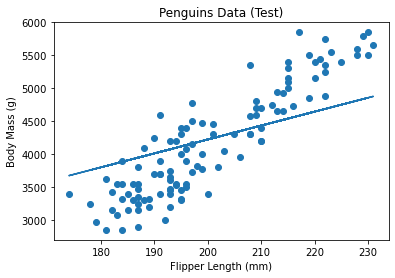

In [22]:
# Plot the test scatters with the predicted line
plt.scatter(X_test, y_test)
plt.plot(X_test, [w*x + b for x in X_test])
plt.title("Penguins Data (Test)")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

The model performance is just OK. To my opinion, the slope of the line should be larger. And thus, I try to scale the y values to make these two variables in the same scale and then implement my Gradient Descent again.

---

### Scale and Fit

Try to scale this two variable and repeat the precedures:

I scale the y_train values by the ratio of the mean of X and y.

In [23]:
# Scale y_train data by the ratio of the mean of X_trian and y_train
X_mean = X_train.mean()
y_mean = y_train.mean()
s = y_mean/X_mean
y_train_scaled = y_train/s

21.073855910741187 7.699898115630277


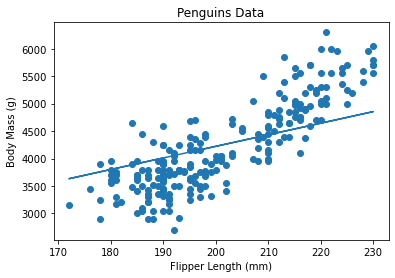

In [24]:
# Set up the learning rate
a = 0.00001

# Randomly initial w and b
random_vec = np.random.rand(2)
w = random_vec[0]
b = random_vec[1]

# Set up M, which is the number of the training data points
M = len(y_train)

# Iterate 1000 times to find the w and b that minimize the Loss function
for i in range(1001):
    dw, db = gradL(X_train, y_train_scaled, w, b)
    #print(dw, db)
    w = w - a * dw
    b = b- a * db
    #print(w, b)
    L = Loss(X_train, y_train_scaled, w, b)

# Output the w and b (inverse-transformed)   
print(s*w,s*b)

# Plot the fitting line with the data points
plt.scatter(X_train, y_train)
plt.plot(X_train, [w*s*x + b*s for x in X_train])
plt.title("Penguins Data")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

From the results above, the linear regression model is 
$$\hat y^i= 21.10x^i + 1.43$$
which is similar to the result without scaling.

And thus, the different scales of the X and y may not affect the performance of my Gradient Descent algorithm.

---

### Validate the regression model by *LinearReression* function in sklearn package:

In [25]:
# Extract out desired features from Penguins Dataset, and covert features to numpy array
X = penguins['flipper_length_mm'].to_numpy()

# Extract out labels, and convert labels to numpy array
y = penguins['body_mass_g'].to_numpy()

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.33,
                                                   random_state = 42) # like seed in R

# Reshape the np.array to meet the requirement of LinearReression function 
X_train = np.reshape(X_train, (-1, 1))
y_train = np.reshape(y_train, (-1, 1))
X_test = np.reshape(X_test, (-1, 1))
y_test = np.reshape(y_test, (-1, 1))

In [26]:
# Import and implement LinearReression in sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_, reg.intercept_)

[[48.26039714]] [-5487.21464001]


The model predicted by *LinearReression* function is 

$$\hat y^i = 48.26x-5487.21$$
suggesting that the penguins' flipper length increase by 1 mm would lead to the increasement of body mass by 48.26 g.

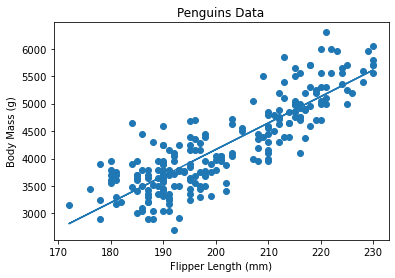

In [27]:
# Plot the predicted model with training data
y_pred = reg.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred)
plt.title("Penguins Data")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

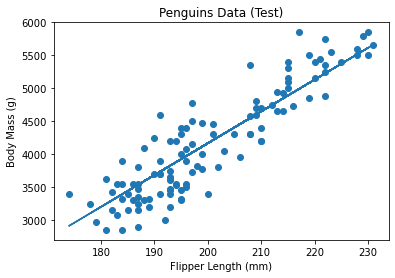

In [28]:
# Plot the predicted model with test data
y_pred = reg.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test,y_pred)
plt.title("Penguins Data (Test)")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.show()

From scatter plots with predicted model, almost all the points located around the regression line, which means that the predicted model perform well!

---

### Conclusion

Compare the performance of my Gradient Descent algorithm to that of the *LinearReression* function in sklearn package, the *LinearReression* function works better. There must be some parameters that need to be further adjusted.